Anzahl unterschiedlicher PARTICIPANT_IDs: 144


C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27703 (\N{CJK UNIFIED IDEOGRAPH-6C37}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22602 (\N{CJK UNIFIED IDEOGRAPH-584A}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12399 (\N{HIRAGANA LETTER HA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dekassla\Coding\kd-processing\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12

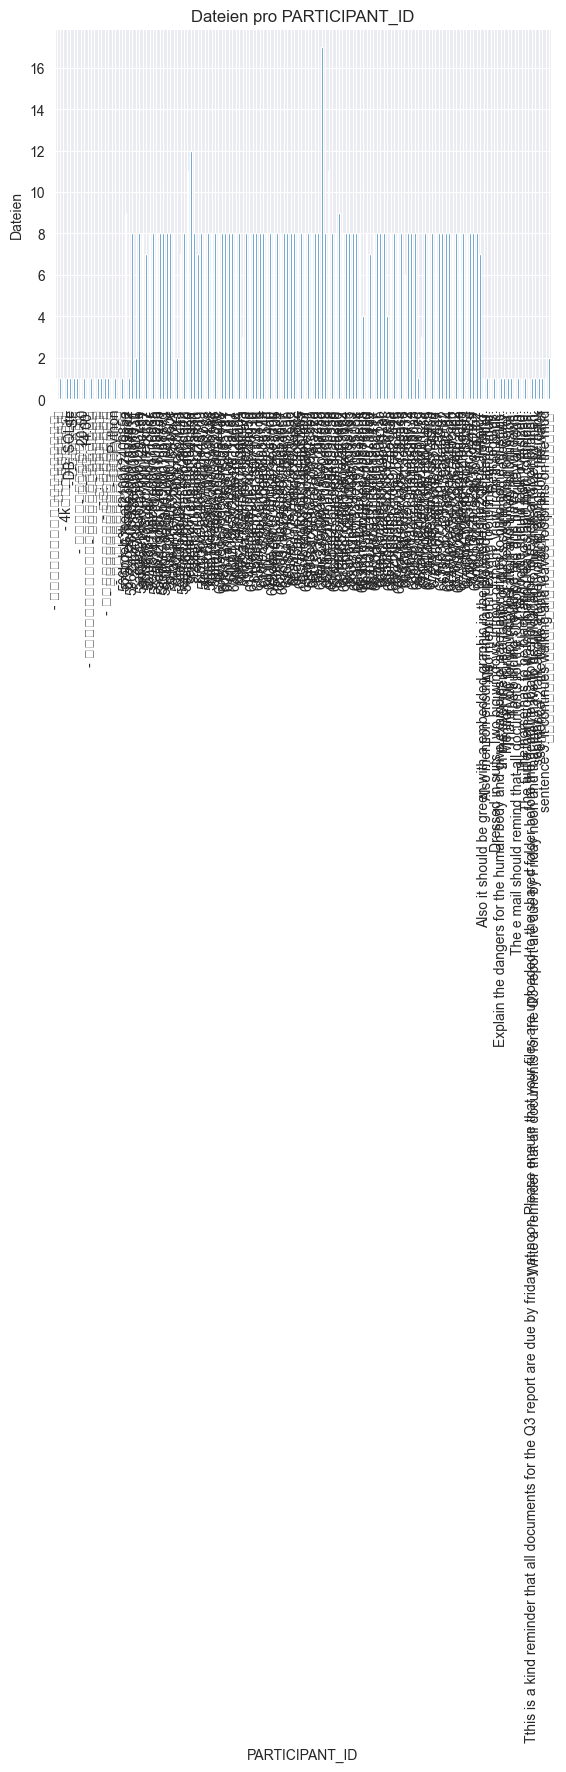

UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('float64'), dtype('<U18')) -> None

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from numpy.ma.core import count

# Alle CSV-Dateien im Ordner 'keystrokes' einlesen
folder = 'data/keystrokes'
all_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.csv')]

dfs = []
for file in all_files:
    df = pd.read_csv(file)
    df['SOURCE_FILE'] = file  # Dateiherkunft merken
    dfs.append(df)
data = pd.concat(dfs, ignore_index=True)

# 1. Anzahl unterschiedlicher PARTICIPANT_IDs
unique_participants = data['PARTICIPANT_ID'].nunique()
print(f"Anzahl unterschiedlicher PARTICIPANT_IDs: {unique_participants}")

# 2. Plot: Anzahl Dateien pro PARTICIPANT_ID
files_per_participant = data.groupby('PARTICIPANT_ID')['SOURCE_FILE'].nunique()
files_per_participant.plot(kind='bar')
plt.title('Dateien pro PARTICIPANT_ID')
plt.xlabel('PARTICIPANT_ID')
plt.ylabel('Dateien')
plt.show()

# 3. Gesamtnutzungszeit pro PARTICIPANT_ID (letzte RELEASE_TIME - erste PRESS_TIME)
def usage_time(df):
    return df['RELEASE_TIME'].max() - df['PRESS_TIME'].min()

usage_times = data.groupby('PARTICIPANT_ID').apply(usage_time)
print("Gesamtnutzungszeit pro PARTICIPANT_ID (ms):")
print(usage_times)

# 4. Verteilung der FREQUENCY-Spalte
plt.figure()
data['FREQUENCY'].value_counts().sort_index().plot(kind='bar')
plt.title('Verteilung FREQUENCY')
plt.xlabel('FREQUENCY')
plt.ylabel('Anzahl')
plt.show()

# 5. Länge der PROMPT-Spalte pro Datei
def prompt_length_per_file(df):
    return df['PROMPT'].astype(str).apply(len).sum()

prompt_lengths = data.groupby('SOURCE_FILE').apply(prompt_length_per_file)
print("Länge der PROMPT-Spalte pro Datei:")
print(prompt_lengths)

In [2]:
import os
import pandas as pd


folder = 'data/keystrokes'
all_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.csv')]

dfs = []
for file in all_files:
    df = pd.read_csv(file)
    df['SOURCE_FILE'] = file
    dfs.append(df)
data = pd.concat(dfs, ignore_index=True)

uniqueIds = data.PARTICIPANT_ID.nunique()
print(f"count of unique Participant ids: {uniqueIds}")

count of unique Participant ids: 11


In [5]:
import csv

unique_ids = set()

for file in all_files:
    with open(file, 'r', encoding='utf-8') as f:
        reader = csv.reader(f)
        header = next(reader)
        try:
            pid_idx = header.index('PARTICIPANT_ID')
        except ValueError:
            continue  # Skip files without the column
        for row in reader:
            if len(row) > pid_idx:
                participant_id = row[pid_idx]
                unique_ids.add(participant_id)

print("Unique PARTICIPANT_IDs:")
for pid in unique_ids:
    print(pid)
print(f"Total unique PARTICIPANT_IDs: {len(unique_ids)}")

Unique PARTICIPANT_IDs:
67acbb030811018b016dcaf7
65fda4aa45ba55e983e2a2d9
Tthis is a kind reminder that all documents for the Q3 report are due by friday at noon.Please ensure that your files are uploaded to the shared folder before the deadline to allow enough time to review and compilation.
66c4a3da2faac6abe33860ec
6400e3697879c55c323f34d0
65feaaac53eb219f09ad5ea0
- 安定して動作するようにする
5f4e12f4bfcaa83ec7f3f5f0
5f29eff59714081a3594a331
66bb6b7e0ccbed81f3ed30a8
5adae3ebdec767000128c131
  - 海の色は黒に近い色
5ea56ad134f3aa550dd26320
664e413a5f3eb7f99d90e15b
- 暗号化などをして、外部に情報が漏れないようにする
67450bce7a49cb1c784dcc2b
65a3ec77f674ac3e98f0c6ac
6725030a6ee43d8130ceefc5
664fa86722f5339adebd32ec
616f9519fb3906da76b8e173
67d80b3db0cac8b1bd982fb2
676797a573d3cbf6add72f02
6672fea3fe6378e257b6ef25
sentence 3: it continues walking and leaves footprints on the mud
664b44d8a11f1bcbba9e0494
65fb34c4df61f03ce0dd6dd9
The horse has to be black and has to origin from Friesland.
664c8dd7baa052f7b1e88417
663378460f834e9670d1508

In [16]:
import os
import re
import pandas as pd

def is_valid_participant_id(pid):
    # Checks if the id is 24 chars, only lowercase letters and digits
    return bool(re.fullmatch(r'[a-z0-9]{24}', str(pid)))

def print_invalid_participant_ids(file_paths):
    for path in file_paths:
        try:
            df = pd.read_csv(path)
            for pid in df.get('PARTICIPANT_ID', []):
                if not is_valid_participant_id(pid):
                    print(f"Invalid PARTICIPANT_ID in file {path}: {pid}")
        except Exception as e:
            print(f"Error reading {path}: {e}")

def print_unique_valid_participant_ids(file_paths):
    valid_ids = set()
    for path in file_paths:
        try:
            df = pd.read_csv(path)
            for pid in df.get('PARTICIPANT_ID', []):
                if is_valid_participant_id(pid):
                    valid_ids.add(pid)
        except Exception as e:
            print(f"Error reading {path}: {e}")
    print("Unique valid PARTICIPANT_IDs:")
    for pid in valid_ids:
        print(pid)
    print(f"Total valid PARTICIPANT_IDs: {len(valid_ids)}")

folder = 'data/keystrokes'
all_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.csv')]

print_invalid_participant_ids(all_files)
print_unique_valid_participant_ids(all_files)

Invalid PARTICIPANT_ID in file data/keystrokes\experiment_5fa76304caa4374da116923a_20250827023605.csv: Write a reminder that all documents for the Q3 report are due by Friday noon and that they have to be uploaded to the shared folder by then.
Invalid PARTICIPANT_ID in file data/keystrokes\experiment_5fa76304caa4374da116923a_20250827023605.csv: Write a reminder that all documents for the Q3 report are due by Friday noon and that they have to be uploaded to the shared folder by then.
Invalid PARTICIPANT_ID in file data/keystrokes\experiment_5fa76304caa4374da116923a_20250827023605.csv: Write a reminder that all documents for the Q3 report are due by Friday noon and that they have to be uploaded to the shared folder by then.
Invalid PARTICIPANT_ID in file data/keystrokes\experiment_5fa76304caa4374da116923a_20250827023605.csv: Write a reminder that all documents for the Q3 report are due by Friday noon and that they have to be uploaded to the shared folder by then.
Invalid PARTICIPANT_ID i

In [31]:
import re
import pandas as pd
import shutil
import os

def is_valid_participant_id(pid):
    # Checks if the id is 24 chars, only lowercase letters and digits
    return bool(re.fullmatch(r'[a-z0-9]{24}', str(pid)))

def get_files_with_invalid_participant_ids(file_paths):
    invalid_files = set()
    for path in file_paths:
        try:
            df = pd.read_csv(path)
            for pid in df.get('PARTICIPANT_ID', []):
                if not is_valid_participant_id(pid):
                    invalid_files.add(path)
                    break
        except Exception as e:
            print(f"Error reading {path}: {e}")
    return invalid_files

# Example usage:
invalid_files = get_files_with_invalid_participant_ids(all_files)
os.makedirs('data/valid_keystrokes', exist_ok=True)
for file in all_files:
    if file not in invalid_files:
        shutil.copy(file, os.path.join('data/valid_keystrokes', os.path.basename(file)))

In [32]:
import csv

folder = 'data/valid_keystrokes'
all_valid_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.csv')]

unique_ids = set()

for file in all_valid_files:
    with open(file, 'r', encoding='utf-8') as f:
        reader = csv.reader(f)
        header = next(reader)
        try:
            pid_idx = header.index('PARTICIPANT_ID')
        except ValueError:
            continue  # Skip files without the column
        for row in reader:
            if len(row) > pid_idx:
                participant_id = row[pid_idx]
                unique_ids.add(participant_id)

print("Unique PARTICIPANT_IDs:")
for pid in unique_ids:
    print(pid)
print(f"Total unique PARTICIPANT_IDs: {len(unique_ids)}")

Unique PARTICIPANT_IDs:
67acbb030811018b016dcaf7
65fda4aa45ba55e983e2a2d9
66c4a3da2faac6abe33860ec
6400e3697879c55c323f34d0
65feaaac53eb219f09ad5ea0
5f4e12f4bfcaa83ec7f3f5f0
5f29eff59714081a3594a331
66bb6b7e0ccbed81f3ed30a8
5adae3ebdec767000128c131
5ea56ad134f3aa550dd26320
664e413a5f3eb7f99d90e15b
67450bce7a49cb1c784dcc2b
65a3ec77f674ac3e98f0c6ac
6725030a6ee43d8130ceefc5
664fa86722f5339adebd32ec
616f9519fb3906da76b8e173
67d80b3db0cac8b1bd982fb2
676797a573d3cbf6add72f02
6672fea3fe6378e257b6ef25
664b44d8a11f1bcbba9e0494
65fb34c4df61f03ce0dd6dd9
664c8dd7baa052f7b1e88417
663378460f834e9670d1508c
65f03cac071873738667ccbb
5fbfe145e52a44000a9c2966
67356f7cf6ff16fe3322a837
6870acd4d7a2c843c144bfd7
6150ca3f37e1fe330f70311d
673d0377254c407e5da57f97
666f76b68b89442817be678a
6672bf56d51710391ce2164d
57507e67fcaa630007cb9ad2
65fbb4220141f00a2ed68e4b
672f4f1751ad53d8967e67bd
5bf368846edd7200017136c7
6081728972120aa7f9685791
6725c4a8e3ab0787551acf38
67d01f812bf82a710cd2193f
5d40a12f4994c40001e4b80c
6

In [3]:
# count columns
df_rows_count_current = []
for file in all_files:
    df_current = pd.read_csv(file)
    df_current['ROW_COUNT'] = len(df_current)
    df_rows_count_current.append(df_current)
df_rows_count = pd.concat(df_rows_count_current, ignore_index=True)

print(df_rows_count)

                 PARTICIPANT_ID   EXPERIMENTTYPE  EXPERIMENTATTEMPT  \
0      57507e67fcaa630007cb9ad2  prompt-to-image                  0   
1      57507e67fcaa630007cb9ad2  prompt-to-image                  0   
2      57507e67fcaa630007cb9ad2  prompt-to-image                  0   
3      57507e67fcaa630007cb9ad2  prompt-to-image                  0   
4      57507e67fcaa630007cb9ad2  prompt-to-image                  0   
...                         ...              ...                ...   
15684  6643495b44af166c626762cd   text-to-prompt                  1   
15685  6643495b44af166c626762cd   text-to-prompt                  1   
15686  6643495b44af166c626762cd   text-to-prompt                  1   
15687  6643495b44af166c626762cd   text-to-prompt                  1   
15688  6643495b44af166c626762cd   text-to-prompt                  1   

       TOTALATTEMPTCOUNT  LATINSQUARETYPE  \
0                      0                0   
1                      0                0   
2           

In [4]:
# calculate time passing for each file

df_calculate_time_current = []
for file in all_files:
    df_current = pd.read_csv(file)
    df_current['TIME_PASSING'] = df_current['RELEASE_TIME'] - df_current['PRESS_TIME']
    df_calculate_time_current.append(df_current)
df_calculate_time = pd.concat(df_calculate_time_current, ignore_index=True)

print(df_calculate_time)

                 PARTICIPANT_ID   EXPERIMENTTYPE  EXPERIMENTATTEMPT  \
0      57507e67fcaa630007cb9ad2  prompt-to-image                  0   
1      57507e67fcaa630007cb9ad2  prompt-to-image                  0   
2      57507e67fcaa630007cb9ad2  prompt-to-image                  0   
3      57507e67fcaa630007cb9ad2  prompt-to-image                  0   
4      57507e67fcaa630007cb9ad2  prompt-to-image                  0   
...                         ...              ...                ...   
15684  6643495b44af166c626762cd   text-to-prompt                  1   
15685  6643495b44af166c626762cd   text-to-prompt                  1   
15686  6643495b44af166c626762cd   text-to-prompt                  1   
15687  6643495b44af166c626762cd   text-to-prompt                  1   
15688  6643495b44af166c626762cd   text-to-prompt                  1   

       TOTALATTEMPTCOUNT  LATINSQUARETYPE  \
0                      0                0   
1                      0                0   
2           

In [5]:
import pandas as pd

# Gemeinsame Spalten bestimmen
common_cols = list(set(df_calculate_time.columns) & set(df_rows_count.columns))

# Merge auf die gemeinsamen Spalten, nur einzigartige Spalten behalten
merged = pd.merge(
    df_calculate_time,
    df_rows_count[[col for col in df_rows_count.columns if col not in common_cols] + common_cols],
    on=common_cols,
    how='outer'
)

# Optional: Duplikate entfernen
merged = merged.loc[:,~merged.columns.duplicated()]

print(merged)

                 PARTICIPANT_ID   EXPERIMENTTYPE  EXPERIMENTATTEMPT  \
0      6081728972120aa7f9685791  prompt-to-image                  0   
1      6081728972120aa7f9685791  prompt-to-image                  0   
2      6081728972120aa7f9685791  prompt-to-image                  0   
3      6081728972120aa7f9685791  prompt-to-image                  0   
4      6081728972120aa7f9685791  prompt-to-image                  0   
...                         ...              ...                ...   
15684  57507e67fcaa630007cb9ad2  prompt-to-image                  0   
15685  57507e67fcaa630007cb9ad2  prompt-to-image                  0   
15686  57507e67fcaa630007cb9ad2  prompt-to-image                  0   
15687  57507e67fcaa630007cb9ad2  prompt-to-image                  0   
15688  57507e67fcaa630007cb9ad2  prompt-to-image                  0   

       TOTALATTEMPTCOUNT  LATINSQUARETYPE  \
0                      3                6   
1                      3                6   
2           

                   EXPERIMENTATTEMPT  TOTALATTEMPTCOUNT  LATINSQUARETYPE  \
EXPERIMENTATTEMPT           1.000000           0.423162        -0.004377   
TOTALATTEMPTCOUNT           0.423162           1.000000        -0.009766   
LATINSQUARETYPE            -0.004377          -0.009766         1.000000   
KEYSTROKE_ID               -0.172496          -0.181377         0.133619   
PRESS_TIME                  0.094964           0.135313         0.400796   
RELEASE_TIME                0.029610           0.047056         0.007710   
KEYCODE                     0.028415           0.020447         0.018342   
TIME_PASSING                0.029609           0.047055         0.007708   
ROW_COUNT                  -0.245952          -0.258615         0.190519   

                   KEYSTROKE_ID  PRESS_TIME  RELEASE_TIME   KEYCODE  \
EXPERIMENTATTEMPT     -0.172496    0.094964      0.029610  0.028415   
TOTALATTEMPTCOUNT     -0.181377    0.135313      0.047056  0.020447   
LATINSQUARETYPE        0.1

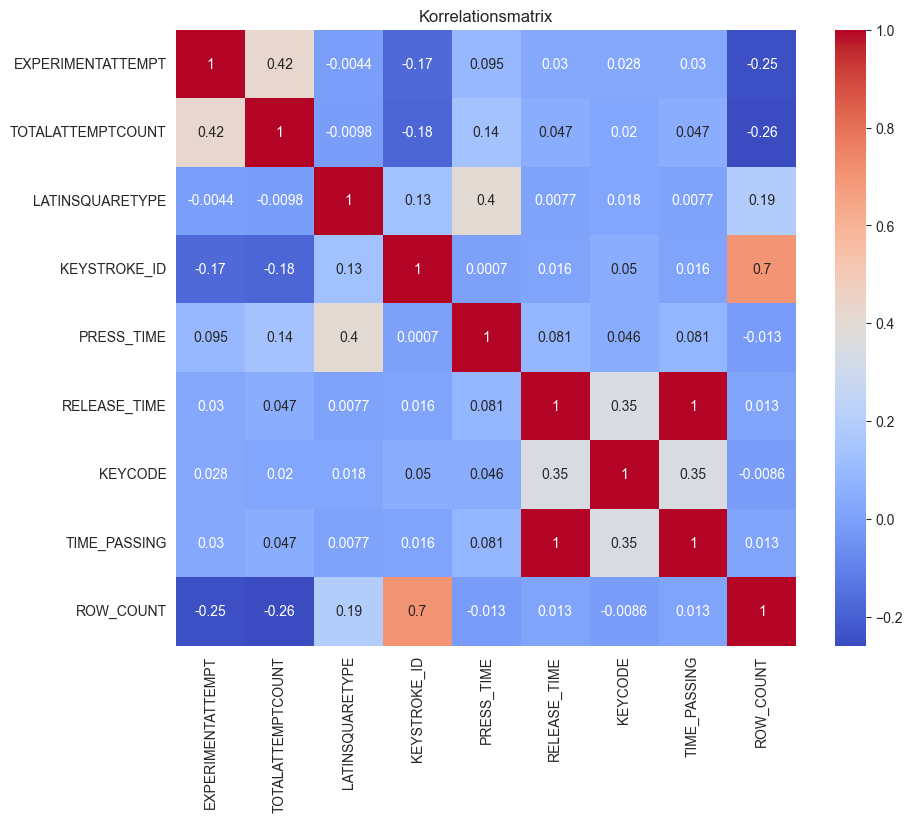

In [6]:
# Correlation

import matplotlib.pyplot as plt
import seaborn as sns

numeric_merged = merged.select_dtypes(include='number')

corr_matrix = numeric_merged.corr()

print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Korrelationsmatrix')
plt.show()

In [7]:
# # merge two dfs
# def merge_keystrokes(df1, df2):
#     common_cols_current = list(set(df1.columns) & set(df2.columns))
#     merged_df = pd.merge(
#             df1,
#             df2[[col for col in df2.columns if col not in common_cols] + common_cols],
#             on=common_cols_current,
#             how='outer'
# )
# merged = merged.loc[:,~merged.columns.duplicated()]
# print(merged)

In [8]:
import pandas as pd

def parse_ranges(ranges_str):
    if pd.isna(ranges_str) or not ranges_str:
        return []
    return [tuple(map(int, r.strip('[]').split(','))) for r in ranges_str.split(';') if r]

def is_keystroke_relevant(keystroke_id, keystroke, ranges):
    relevant = []
    for start, end in ranges:
        if keystroke_id is not None and start <= keystroke_id <= end:
            relevant.append(keystroke_id)
        if str(keystroke).lower() in ['backspace', 'ctrl', 'shift']:
            relevant.append(keystroke_id)
    return list(set(relevant))

def extract_marked_keystrokes(df):
    confident_marked_all = []
    unconfident_marked_all = []

    for idx, row in df.iterrows():
        keystroke_id = row.get('KEYSTROKE_ID', None)
        keystroke = row.get('LETTER', '')
        confident_ranges = parse_ranges(row.get('CONFIDENT', ''))
        unconfident_ranges = parse_ranges(row.get('UNCONFIDENT', ''))

        confident_marked = is_keystroke_relevant(keystroke_id, keystroke, confident_ranges)
        unconfident_marked = is_keystroke_relevant(keystroke_id, keystroke, unconfident_ranges)

        confident_marked_all.append(confident_marked)
        unconfident_marked_all.append(unconfident_marked)

    df['CONFIDENT_MARKED'] = confident_marked_all
    df['UNCONFIDENT_MARKED'] = unconfident_marked_all
    return df

# Beispiel für die Anwendung:
df = pd.read_csv('data/keystrokes/experiment_6140ef8d27499e70e8740918_20250819170107.csv')
df = extract_marked_keystrokes(df)

pd. set_option('display.max_rows', 500)
# merge_keystrokes(df,df_rows_count)



# print(df[['LETTER', 'KEYSTROKE_ID', 'CONFIDENT', 'CONFIDENT_MARKED', 'UNCONFIDENT', 'UNCONFIDENT_MARKED']])



In [9]:
# df = pd.read_csv('data/keystrokes/experiment_6140ef8d27499e70e8740918_20250819170107.csv')
# df = extract_marked_keystrokes(df)
# print(df[['LETTER', 'POSITION', 'CONFIDENT', 'CONFIDENT_MARKED', 'UNCONFIDENT', 'UNCONFIDENT_MARKED']])

In [10]:
import pandas as pd

df_with_same_data = df = pd.read_csv('data/keystrokes/experiment_6140ef8d27499e70e8740918_20250819170107.csv')

# Gemeinsame Spalten bestimmen
common_cols = list(set(df.columns) & set(df_with_same_data.columns))

# Merge auf die gemeinsamen Spalten, nur einzigartige Spalten behalten
merged = pd.merge(
    df,
    df_with_same_data[[col for col in df_with_same_data.columns if col not in common_cols] + common_cols],
    on=common_cols,
    how='outer'
)

# Optional: Duplikate entfernen
merged = merged.loc[:,~merged.columns.duplicated()]

print(merged)

               PARTICIPANT_ID  EXPERIMENTTYPE  EXPERIMENTATTEMPT  \
0    6140ef8d27499e70e8740918  text-to-prompt                  1   
1    6140ef8d27499e70e8740918  text-to-prompt                  1   
2    6140ef8d27499e70e8740918  text-to-prompt                  1   
3    6140ef8d27499e70e8740918  text-to-prompt                  1   
4    6140ef8d27499e70e8740918  text-to-prompt                  1   
5    6140ef8d27499e70e8740918  text-to-prompt                  1   
6    6140ef8d27499e70e8740918  text-to-prompt                  1   
7    6140ef8d27499e70e8740918  text-to-prompt                  1   
8    6140ef8d27499e70e8740918  text-to-prompt                  1   
9    6140ef8d27499e70e8740918  text-to-prompt                  1   
10   6140ef8d27499e70e8740918  text-to-prompt                  1   
11   6140ef8d27499e70e8740918  text-to-prompt                  1   
12   6140ef8d27499e70e8740918  text-to-prompt                  1   
13   6140ef8d27499e70e8740918  text-to-prompt   